<a href="https://colab.research.google.com/github/Mpho-AI/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset


Dataset obtained from:https://archive.ics.uci.edu/dataset/45/heart+disease

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

# Data Cleaning and Exploratory Data Analysis

In [4]:

duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


df_no_duplicates = df.drop_duplicates()

print("Shape after removing duplicates:", df_no_duplicates.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (303, 14)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    

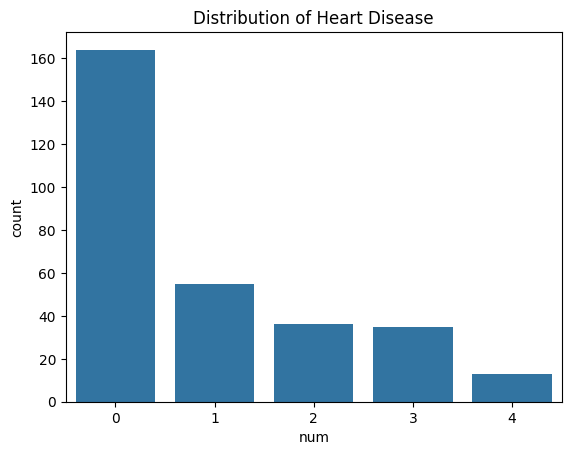

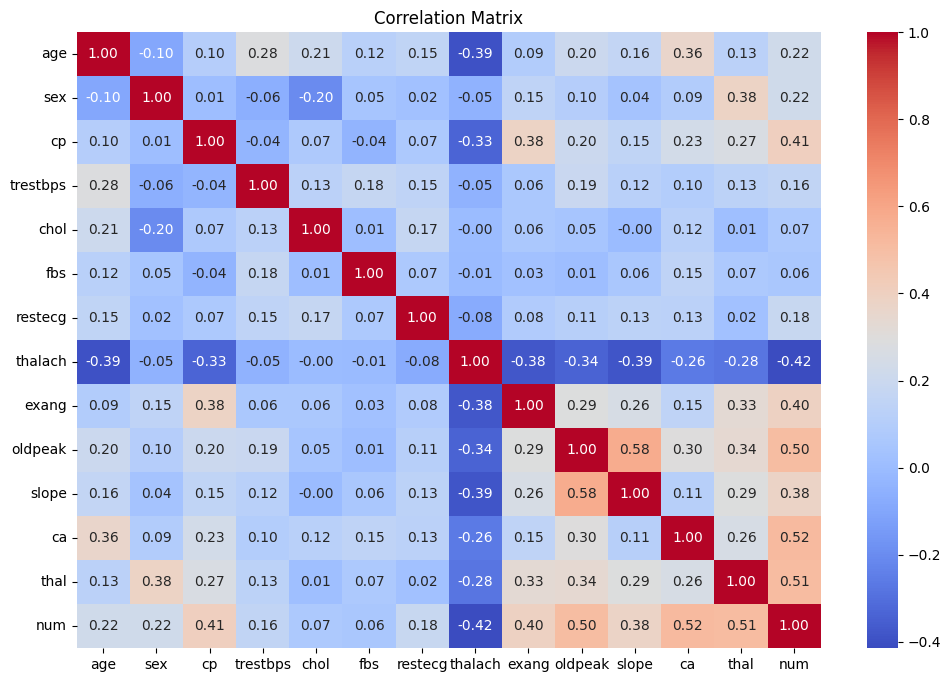

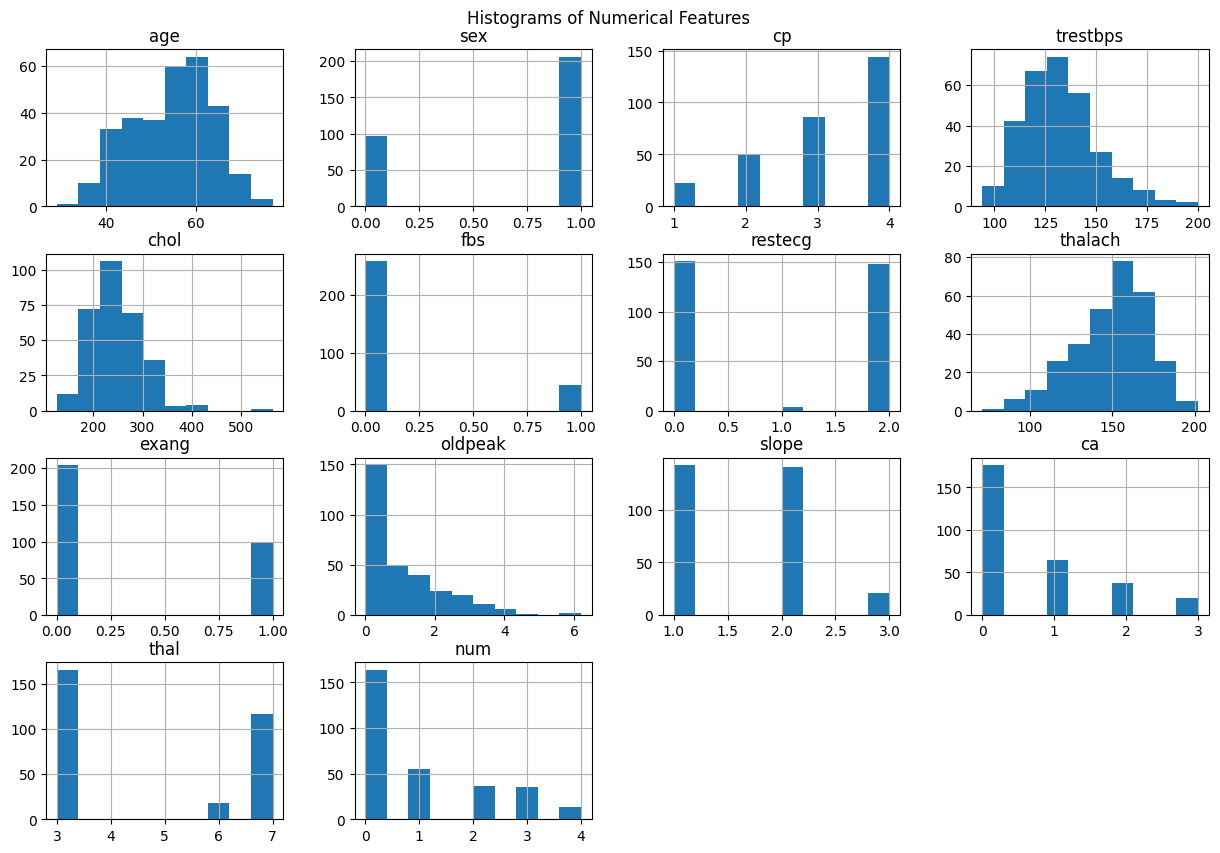

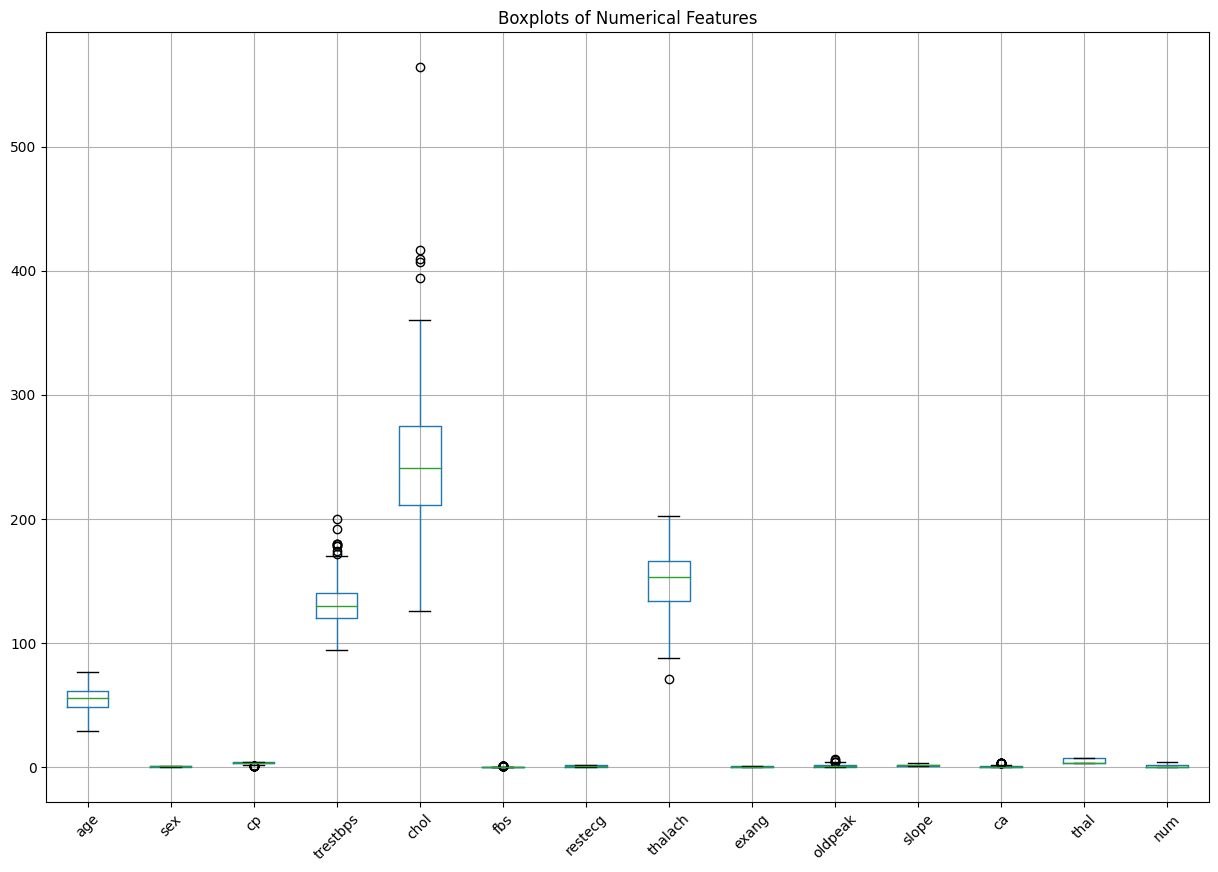

In [3]:
df = pd.concat([X, y], axis=1)

print(df.head())

print(df.describe())

# Distribution of the target variable
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

# Pairwise correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of numerical features
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=0.92)
plt.show()

# Boxplot for each numerical feature
plt.figure(figsize=(15, 10))
df.boxplot(rot=45)
plt.title('Boxplots of Numerical Features')
plt.show()

# Categorical feature analysis
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.show()


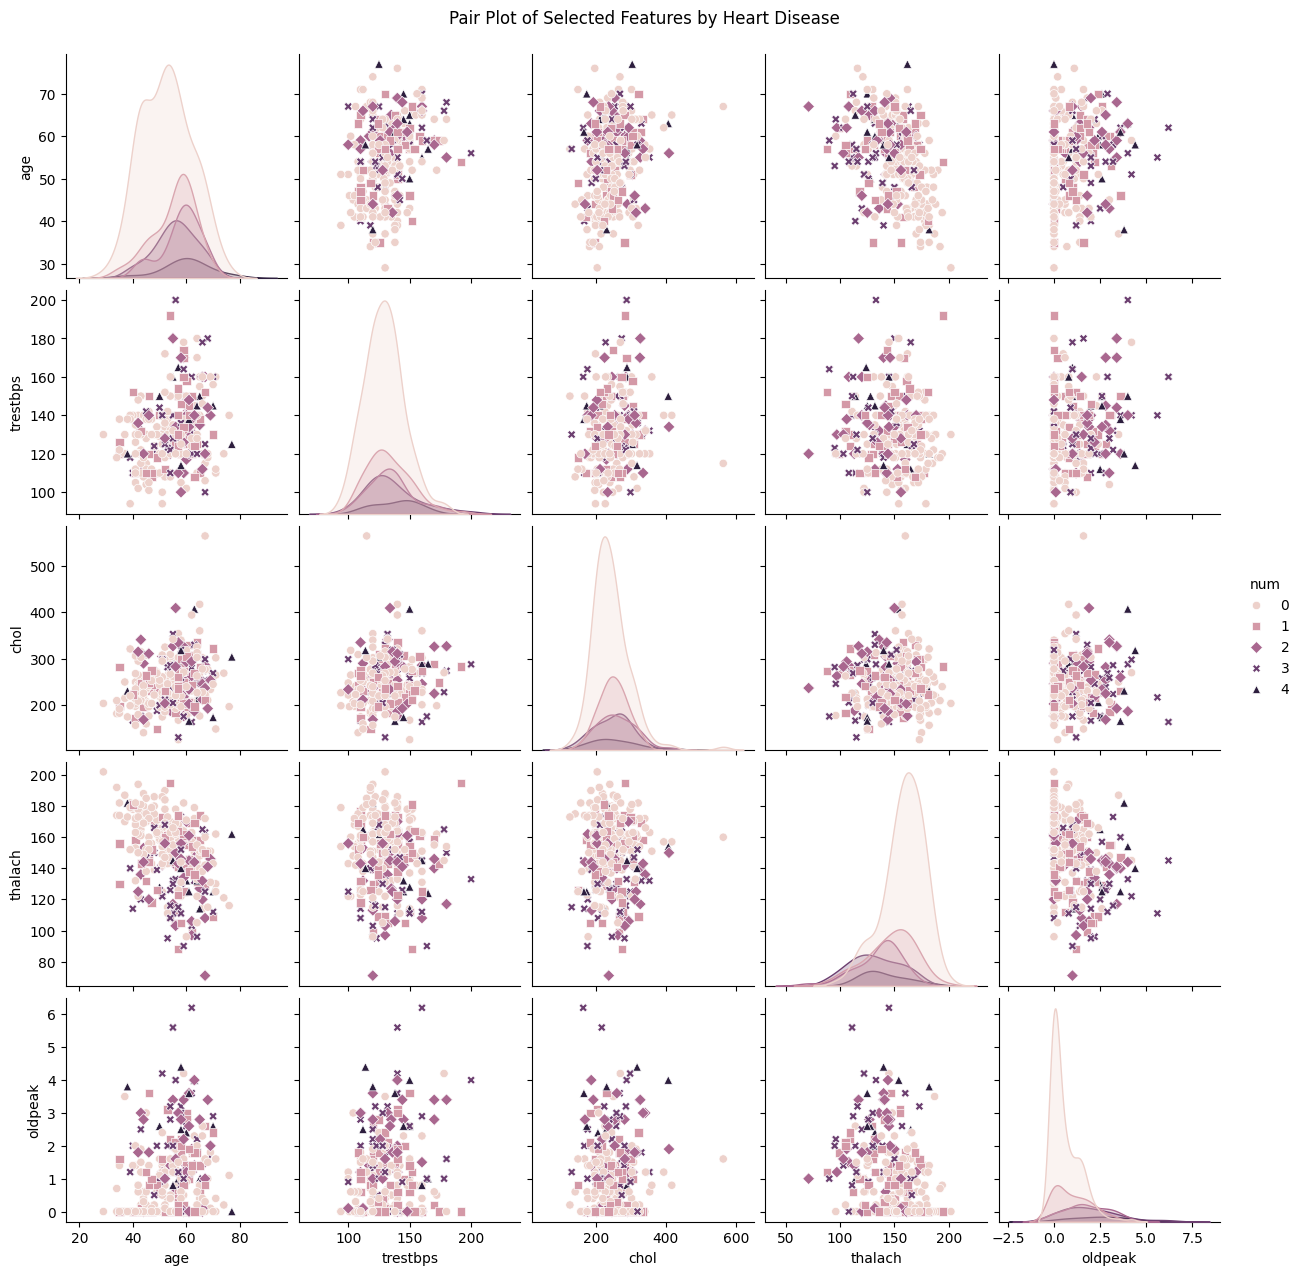

In [5]:
df = pd.concat([X, y], axis=1)

# Selecting a subset of features for the pair plot
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']

# Creating a pair plot
sns.pairplot(df[selected_features], hue='num', diag_kind='kde', markers=["o", "s", "D", "X", "^"])
plt.suptitle('Pair Plot of Selected Features by Heart Disease', y=1.02)
plt.show()


In [6]:
unique_values_cp = X['cp'].unique()

print("Unique values in the 'cp' column:", unique_values_cp)



Unique values in the 'cp' column: [1 4 3 2]


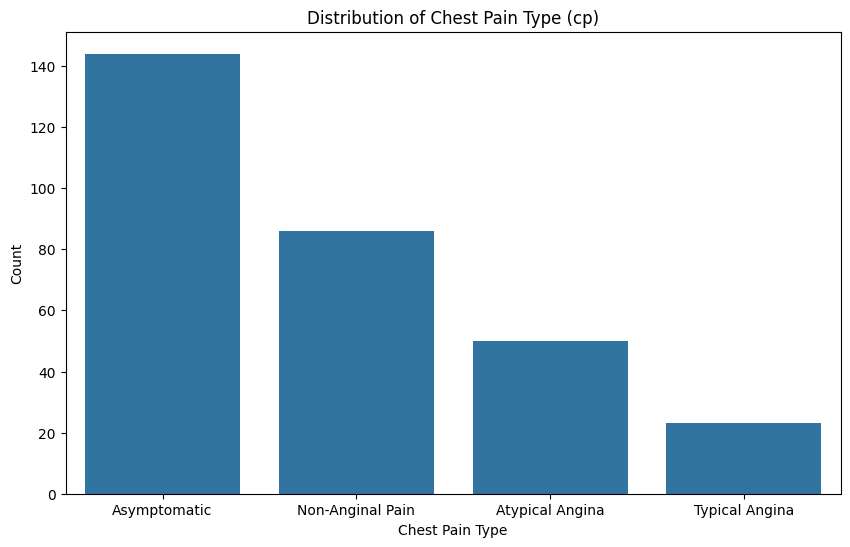

In [8]:


# Mapping numeric values to their corresponding labels
cp_labels = {1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Anginal Pain', 4: 'Asymptomatic'}
X['cp_labels'] = X['cp'].map(cp_labels)

# Counting occurrences of each chest pain type
cp_counts = X['cp_labels'].value_counts()

# Creating a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=cp_counts.index, y=cp_counts.values)
plt.title('Distribution of Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


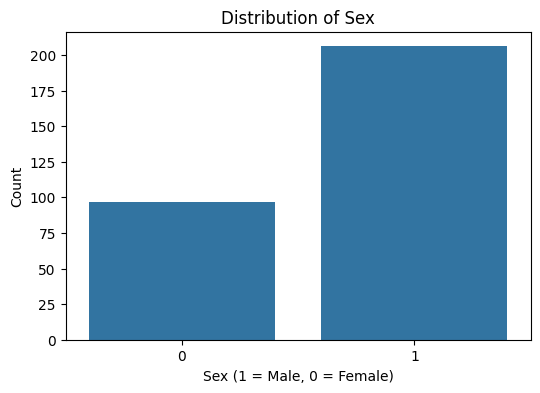

In [9]:

# Counting occurrences of each sex
sex_counts = X['sex'].value_counts()

# Creating a barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Distribution of Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.show()



In [10]:
unique_values_oldpeak = X['oldpeak'].unique()

# Displaying unique values in the 'oldpeak' column
print("Unique values in the 'oldpeak' column:", unique_values_oldpeak)


Unique values in the 'oldpeak' column: [2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]


In [17]:

selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'ca', 'thal', 'oldpeak', 'slope']
new_data = pd.concat([X[selected_features], y.reset_index(drop=True)], axis=1)

# Displaying the first few rows of the new DataFrame
print(new_data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   ca  thal  \
0   63    1   1       145   233    1        2      150      0  0.0   6.0   
1   67    1   4       160   286    0        2      108      1  3.0   3.0   
2   67    1   4       120   229    0        2      129      1  2.0   7.0   
3   37    1   3       130   250    0        0      187      0  0.0   3.0   
4   41    0   2       130   204    0        2      172      0  0.0   3.0   

   oldpeak  slope  num  
0      2.3      3    0  
1      1.5      2    2  
2      2.6      2    1  
3      3.5      3    0  
4      1.4      1    0  


In [24]:
X_cleaned = X.dropna()
y_cleaned = y[X.index.isin(X_cleaned.index)]


In [25]:
# Drop rows with missing values
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train.index.isin(X_train_cleaned.index)]

X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test[X_test.index.isin(X_test_cleaned.index)]

# Continue with model training
svm_model.fit(X_train_cleaned, y_train_cleaned)



SVC()

In [27]:
# Check for missing values in X
print(X.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
cp_labels    0
dtype: int64


In [28]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_columns = ['ca', 'thal']
categorical_columns = [col for col in X.columns if col not in numerical_columns]

# Impute missing values for numerical features
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])

# Impute missing values for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])

# Check for missing values again
print(X.isnull().sum())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
cp_labels    0
dtype: int64


In [30]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
ca          3
thal        2
oldpeak     0
slope       0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
ca          1
thal        0
oldpeak     0
slope       0
dtype: int64


In [31]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train[['ca', 'thal']] = numerical_imputer.fit_transform(X_train[['ca', 'thal']])

# Transform the imputer on the testing data
X_test[['ca', 'thal']] = numerical_imputer.transform(X_test[['ca', 'thal']])


In [32]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
ca          0
thal        0
oldpeak     0
slope       0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
ca          0
thal        0
oldpeak     0
slope       0
dtype: int64


In [34]:
# Check for NaN values in your dataset
print(new_data.isnull().sum())

# If there are NaN values, fill them with appropriate values
new_data = new_data.fillna(new_data.mean())  # You can use other imputation methods as well

# Now, check again for NaN values
print(new_data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
ca          4
thal        2
oldpeak     0
slope       0
num         0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
ca          0
thal        0
oldpeak     0
slope       0
num         0
dtype: int64


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('num', axis=1), new_data['num'], test_size=0.2, random_state=42)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_predictions))

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_predictions))

# Artificial Neural Network (ANN)
ann_model = MLPClassifier()
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print("ANN Accuracy:", ann_accuracy)
print(classification_report(y_test, ann_predictions))

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))


SVM Accuracy: 0.47540983606557374
              precision    recall  f1-score   support

           0       0.48      1.00      0.64        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.10      0.20      0.13        61
weighted avg       0.23      0.48      0.31        61

Decision Tree Accuracy: 0.4918032786885246
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.22      0.17      0.19        12
           2       0.27      0.33      0.30         9
           3       0.00      0.00      0.00         7
           4       0.33      0.25      0.29         4

    accuracy                           0.49        61
   macro avg       0.33      0.32      0.32        61


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

ANN Accuracy: 0.5901639344262295
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.43      0.50      0.46        12
           2       0.25      0.33      0.29         9
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         4

    accuracy                           0.59        61
   macro avg       0.49      0.37      0.37        61
weighted avg       0.61      0.59      0.56        61

Logistic Regression Accuracy: 0.5573770491803278
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.25      0.17      0.20        12
           2       0.33      0.33      0.33         9
           3       0.22      0.29      0.25         7
           4       0.00      0.00      0.00         4

    accuracy                           0.56        61
   macro avg       0.32      0.34      0.33      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

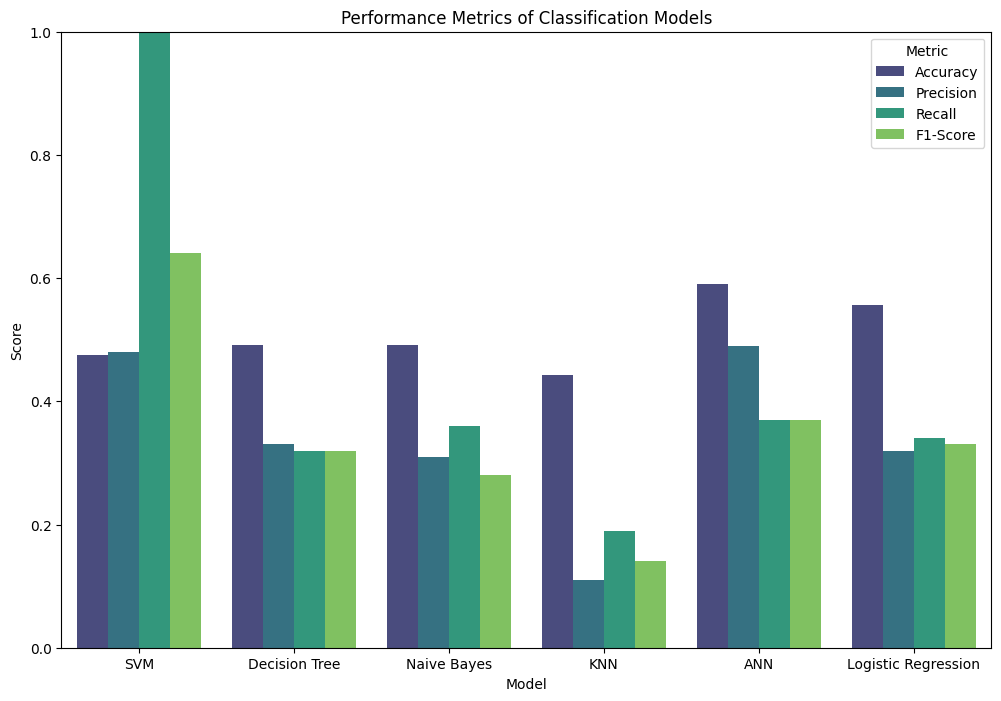

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define the models and their performance metrics
models = ['SVM', 'Decision Tree', 'Naive Bayes', 'KNN', 'ANN', 'Logistic Regression']
accuracies = [0.475, 0.492, 0.492, 0.443, 0.590, 0.557]
precisions = [0.48, 0.33, 0.31, 0.11, 0.49, 0.32]
recalls = [1.00, 0.32, 0.36, 0.19, 0.37, 0.34]
f1_scores = [0.64, 0.32, 0.28, 0.14, 0.37, 0.33]

# Create a DataFrame for visualization
performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions, 'Recall': recalls, 'F1-Score': f1_scores})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(performance_df, id_vars='Model', var_name='Metric', value_name='Score')

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df, palette='viridis')
plt.title('Performance Metrics of Classification Models')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scale
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('num', axis=1), new_data['num'], test_size=0.2, random_state=42)

# Define a function to calculate additional metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp)

    # Sensitivity (True Positive Rate)
    sensitivity = tp / (tp + fn)

    # Precision
    precision = tp / (tp + fp)

    # Matthews Correlation Coefficient
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tn + fn) * (tp + fn) * (tn + fp)) ** 0.5 if (tp + fp) * (tn + fn) * (tp + fn) * (tn + fp) != 0 else 0

    return specificity, sensitivity, precision, mcc

# List of models
models = [SVC(), DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), MLPClassifier(), LogisticRegression()]

# Iterate over models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print model name
    print(type(model).__name__)

    # Print accuracy
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and print additional metrics
    specificity, sensitivity, precision, mcc = calculate_metrics(y_test, y_pred)
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Matthews Correlation Coefficient:", mcc)

    # Print a separator for better readability
    print("\n" + "="*50 + "\n")


SVC
Accuracy: 0.47540983606557374
Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.64        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.10      0.20      0.13        61
weighted avg       0.23      0.48      0.31        61

Specificity: 1.0
Sensitivity: 0.0
Precision: nan
Matthews Correlation Coefficient: 0


DecisionTreeClassifier
Accuracy: 0.5081967213114754
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.45      0.42      0.43        12
           2       0.25      0.22      0.24         9
           3       0.11      0.14      0.12         7
           4       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-39-fc2940c5729b>:30: RuntimeWarning: invalid valu

              precision    recall  f1-score   support

           0       0.55      0.93      0.69        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.44        61
   macro avg       0.11      0.19      0.14        61
weighted avg       0.26      0.44      0.33        61

Specificity: 0.9310344827586207
Sensitivity: 0.0
Precision: 0.0
Matthews Correlation Coefficient: -0.13652592788242301


MLPClassifier
Accuracy: 0.4918032786885246
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.25      0.25      0.25        12
           2       0.25      0.11      0.15         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

<ipython-input-41-801110c6fe7b>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


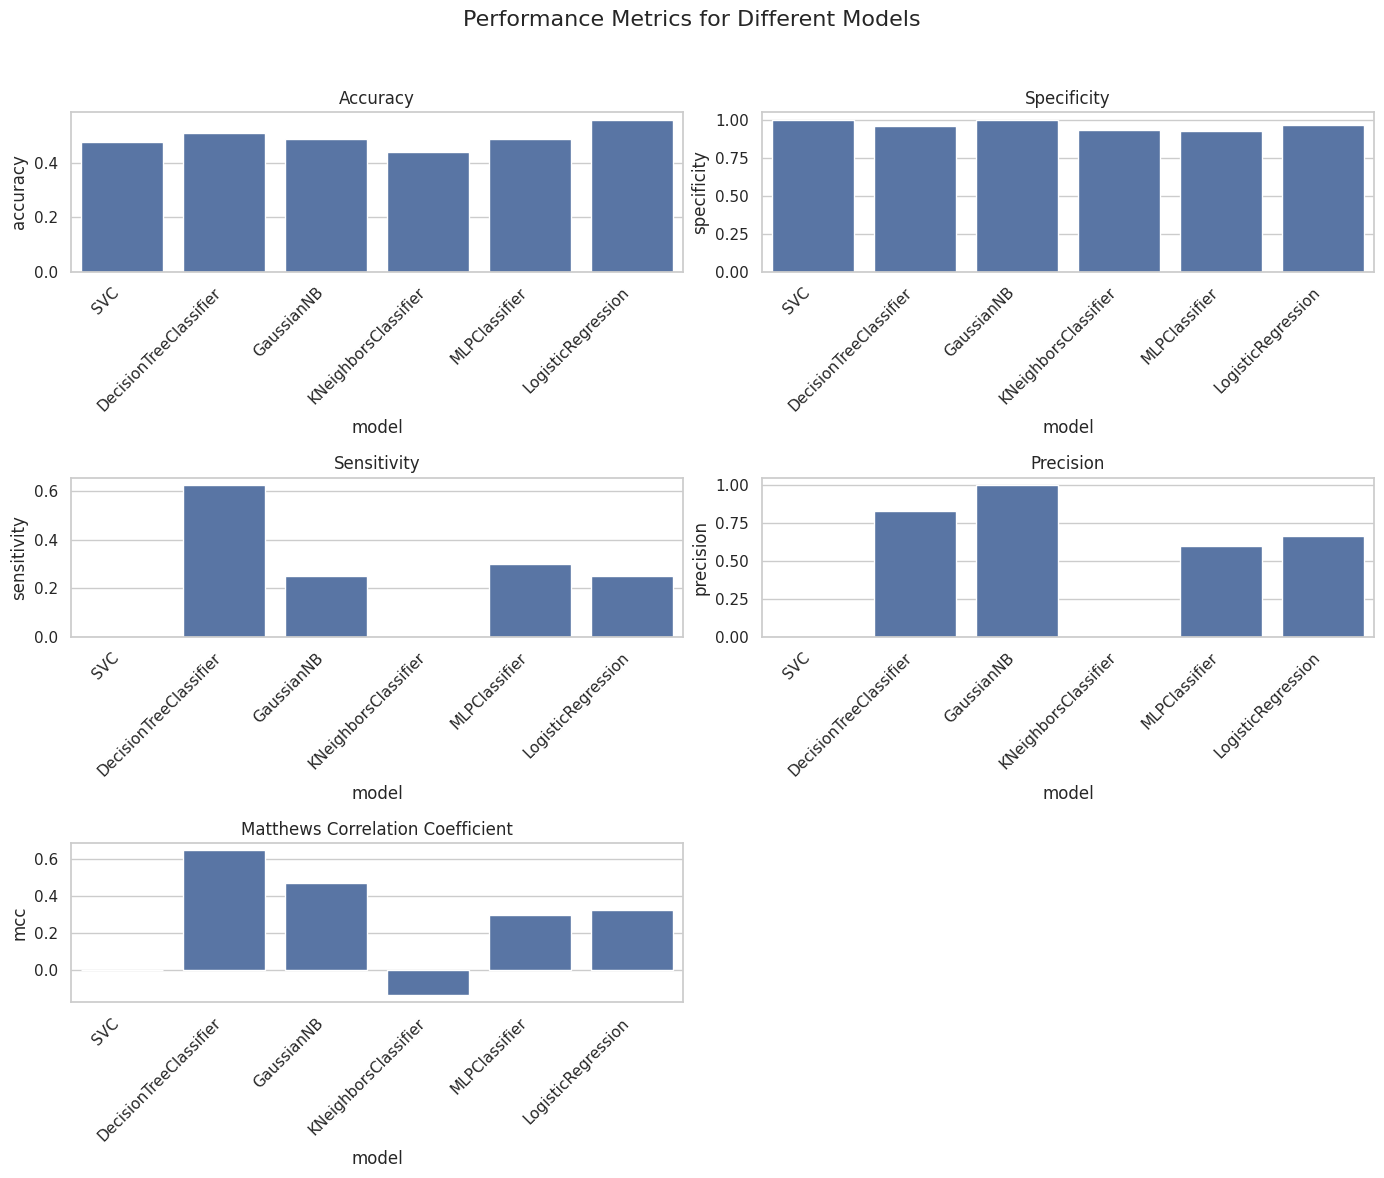

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of dictionaries with your data
results = [
    {'model': 'SVC', 'accuracy': 0.48, 'specificity': 1.0, 'sensitivity': 0.0, 'precision': float('nan'), 'mcc': 0.0},
    {'model': 'DecisionTreeClassifier', 'accuracy': 0.51, 'specificity': 0.958, 'sensitivity': 0.625, 'precision': 0.833, 'mcc': 0.647},
    {'model': 'GaussianNB', 'accuracy': 0.49, 'specificity': 1.0, 'sensitivity': 0.25, 'precision': 1.0, 'mcc': 0.472},
    {'model': 'KNeighborsClassifier', 'accuracy': 0.44, 'specificity': 0.931, 'sensitivity': 0.0, 'precision': 0.0, 'mcc': -0.137},
    {'model': 'MLPClassifier', 'accuracy': 0.49, 'specificity': 0.929, 'sensitivity': 0.3, 'precision': 0.6, 'mcc': 0.298},
    {'model': 'LogisticRegression', 'accuracy': 0.56, 'specificity': 0.964, 'sensitivity': 0.25, 'precision': 0.667, 'mcc': 0.322},
]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame(results)

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Performance Metrics for Different Models', fontsize=16)

# Plot accuracy
sns.barplot(x='model', y='accuracy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

# Plot specificity
sns.barplot(x='model', y='specificity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Specificity')

# Plot sensitivity
sns.barplot(x='model', y='sensitivity', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sensitivity')

# Plot precision
sns.barplot(x='model', y='precision', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Precision')

# Plot MCC
sns.barplot(x='model', y='mcc', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Matthews Correlation Coefficient')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


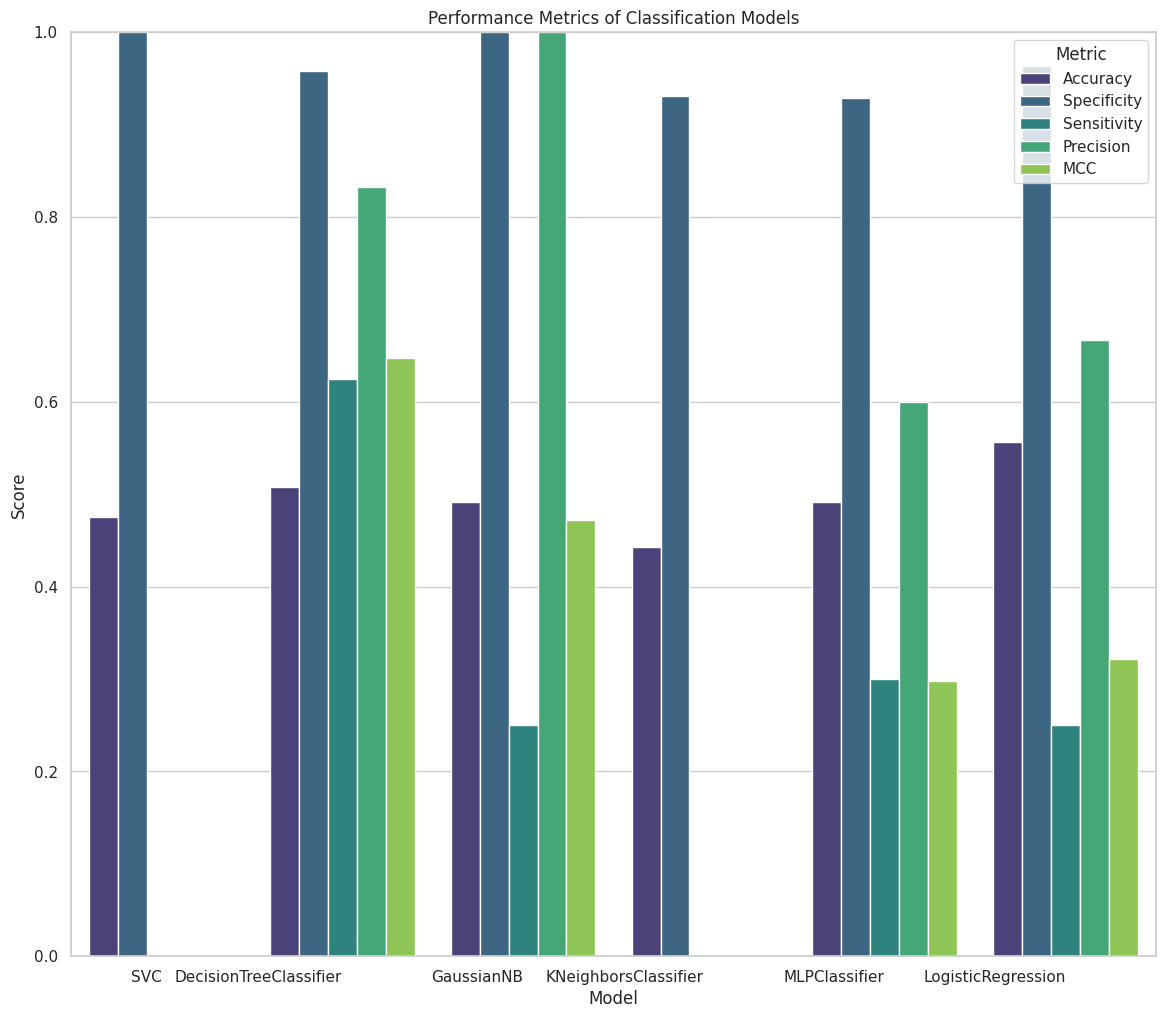

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the models and their performance metrics
models = ['SVC', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighborsClassifier', 'MLPClassifier', 'LogisticRegression']
accuracies = [0.475, 0.508, 0.492, 0.443, 0.492, 0.557]
specificities = [1.0, 0.958, 1.0, 0.931, 0.929, 0.964]
sensitivities = [0.0, 0.625, 0.25, 0.0, 0.3, 0.25]
precisions = [float('nan'), 0.833, 1.0, 0.0, 0.6, 0.667]
mccs = [0.0, 0.647, 0.472, -0.137, 0.298, 0.322]

# Create a DataFrame for visualization
performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Specificity': specificities,
                                'Sensitivity': sensitivities, 'Precision': precisions, 'MCC': mccs})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(performance_df, id_vars='Model', var_name='Metric', value_name='Score')

# Plot using Seaborn
plt.figure(figsize=(14, 12))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df, palette='viridis')
plt.title('Performance Metrics of Classification Models')
plt.ylim(0, 1)  # Set y-axis limit to ensure consistent scale
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels
plt.show()
